<a href="https://colab.research.google.com/github/topcuemre/2D-Gaussian-Splatting-Demo/blob/main/2d_gaussian_splatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before proceeding, please ensure that your notebook is connected to a GPU runtime.

In [ ]:
%cd /content
!git clone https://github.com/atakan-topaloglu/2d-gaussian-splatting --recursive
!pip install -q plyfile

/content
fatal: destination path '2d-gaussian-splatting' already exists and is not an empty directory.


In [ ]:
%cd /content/2d-gaussian-splatting/

/content/2d-gaussian-splatting


In [ ]:
!pip install --upgrade pip setuptools wheel
!apt-get install -y build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


# simple-knn issue:

The FLT_MAX macro, representing the maximum finite value of a float, is defined in the <float.h> header file. If you encounter an "undefined" error for FLT_MAX in the simple-knn project, it's likely due to the absence of this header in the relevant source files.

This [issue](https://github.com/camenduru/simple-knn/issues/2) has been identified in the simple-knn repository, as noted in Issue #2. To resolve this, ensure that any source files utilizing FLT_MAX include the <float.h> header. For example, in ***simple_knn.cu***, you might add:

`#include <float.h>`

In [ ]:
# Manual installation for simple_knn module after modifications
!cd submodules/simple-knn && python setup.py install

/bin/bash: line 1: cd: submodules/simple-knn: No such file or directory


In [ ]:
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda' #ensure that the CUDA path is correct
!pip install ninja
!pip install submodules/simple-knn
!pip install submodules/diff-surfel-rasterization

Processing ./submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Created wheel for simple_knn: filename=simple_knn-0.0.0-cp311-cp311-linux_x86_64.whl size=3079664 sha256=ee50c48f1cd802d49920d964f526fdf6b09e2c9a3f7508ae333235badc85589d
  Stored in directory: /root/.cache/pip/wheels/c9/e6/30/4c5f6beb90bcc3a686002686298354701e938e8d69e434ed2f
Successfully built simple_knn
Processing ./submodules/diff-surfel-rasterization
  Preparing metadata (setup.py) ... done
  Created wheel for diff_surfel_rasterization: filename=diff_surfel_rasterization-0.0.1-cp311-cp311-linux_x86_64.whl size=3322074 sha256=cb92f2c53041830e58c4732798bec9b86397515cb2dbbd2d965108fcf62496aa
  Stored in directory: /root/.cache/pip/wheels/89/33/8d/cbb0da2867c8a6c65de6ec30f4e98297ecb5adbdf7832fc866
Successfully built diff_surfel_rasterization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/2d-gaussian-splatting/

/content/2d-gaussian-splatting


For Colab to access your COLMAP processed data, please copy the COLMAP output to your Google Drive and enter the full COLMAP source path (e.g. /content/drive/MyDrive/COLMAP_out)

In [ ]:
COLMAP_PATH = str(input('Please enter COLMAP output path:'))
# /content/drive/MyDrive/south-building

Please enter COLMAP output path:/content/drive/MyDrive/south-building


In [ ]:
!apt update
!apt install colmap

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,311 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,653 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Get:13 https://ppa.launchpadconte

# Pinhole/Simple Radial Camera Issue:

Convert to SIMPLE_PINHOLE: If you can accept ignoring the radial distortion, you can modify the camera model in the cameras.txt file to SIMPLE_PINHOLE (which is undistorted). You can manually edit the file and replace SIMPLE_RADIAL with SIMPLE_PINHOLE, and also remove the distortion parameter.

in the COLMAP data cameras.txt:

`1 SIMPLE_RADIAL 3072 2304 2559.68 1536 1152 -0.0204997` to `1 SIMPLE_PINHOLE 3072 2304 2559.68 1536 1152`



In [ ]:
# as suggested in the colmap file directory scheme, create a subfolder named "0" in \sparse beforehand which should contain cameras.txt, images.txt and points3D.txt
!colmap model_converter --input_path "/content/drive/MyDrive/south-building/sparse/0" \
                         --output_path "/content/drive/MyDrive/south-building/sparse/0" \
                         --output_type BIN

# Function name change in MATLAB

File "/content/2d-gaussian-splatting/utils/general_utils.py", line 173, in colormap
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'. Did you mean: 'tostring_argb'?


In [ ]:
!python train.py -s $COLMAP_PATH --iterations 30000

2025-02-11 13:03:17.374349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739278997.395777   22768 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739278997.402107   22768 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 13:03:17.424531: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Optimizing 
Output folder: /content/drive/MyDrive/2d_gaussian_splatting/output/5b0c85b4-5 [11/02 13:03:21]
Reading ca

Training is complete, to use render.py, please enter the desired model_path located in your Drive: /content/drive/MyDrive/2d_gaussian_splatting/output/{10 digit UUID}: (e.g: /content/drive/MyDrive/2d_gaussian_splatting/output/8d812792-1)

In [ ]:
MODEL_PATH = str(input('Please enter the model path:'))


Please enter the model path:/content/drive/MyDrive/2d_gaussian_splatting/output/7998a835-a


In [ ]:
!pip3 install open3d==0.18.0 mediapy==1.1.2 lpips==0.1.4 scikit-image==0.21.0 tqdm==4.66.2 trimesh==4.3.2 opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python render.py -m $MODEL_PATH -s $COLMAP_PATH

Looking for config file in /content/drive/MyDrive/2d_gaussian_splatting/output/7998a835-a/cfg_args
Config file found: /content/drive/MyDrive/2d_gaussian_splatting/output/7998a835-a/cfg_args
Rendering /content/drive/MyDrive/2d_gaussian_splatting/output/7998a835-a
Loading trained model at iteration 5000
Reading camera 128/128
Loading Training Cameras
[ INFO ] Encountered quite large input images (>1.6K pixels width), rescaling to 1.6K.
 If this is not desired, please explicitly specify '--resolution/-r' as 1
Loading Test Cameras
export training images ...
reconstruct radiance fields: 128it [00:06, 20.45it/s]
The estimated bounding radius is 2.66
Use at least 5.31 for depth_trunc
export images: 128it [03:09,  1.48s/it]
export mesh ...
reconstruct radiance fields: 128it [00:06, 20.77it/s]
The estimated bounding radius is 2.66
Use at least 5.31 for depth_trunc
Running tsdf volume integration ...
voxel_size: 0.005188810721725678
sdf_trunc: 0.02594405360862839
depth_truc: 5.313342179047094
TS

Training and rendering is complete, please navigate to your drive and see the model outputs under the directory "2d_gaussian_splatting/".

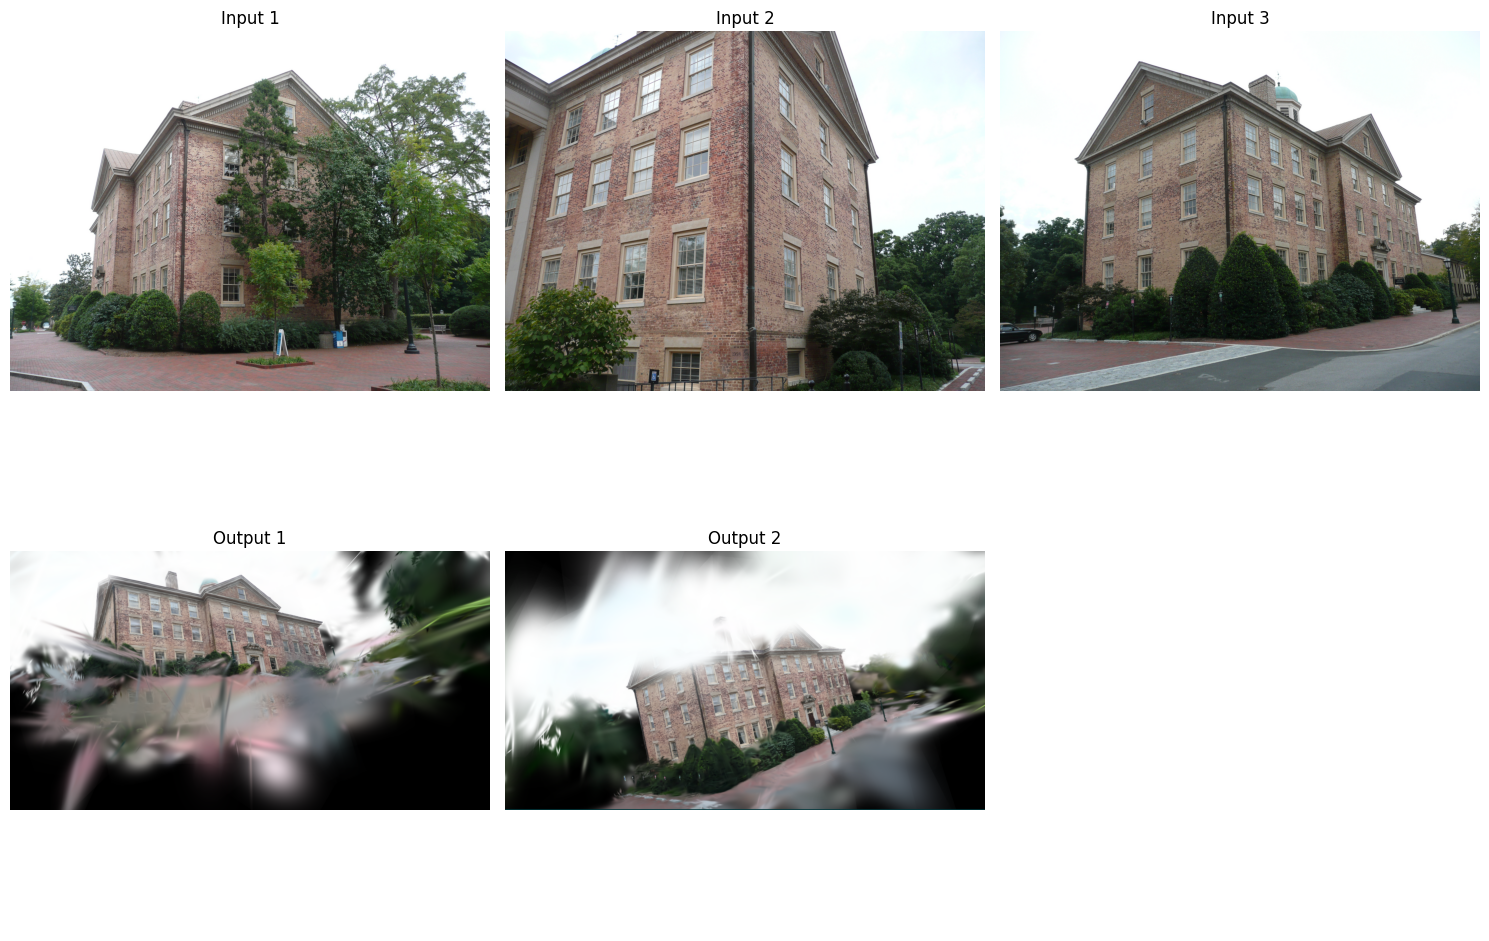

In [6]:
# prompt: i want to present 3 input images in this cell. reshape them and fit them onto single output line image paths: 1) /content/P1180141.JPG 2) /content/P1180183.JPG 3) /content/P1180310.JPG . label them "Inputs" with. make spacing between them . and the 2 output images  are 4) /content/1.png 5) /content/2.png. put inputs on the top row and outputs at bottom row. and make them slightly bigger. bigger outputs

from IPython.display import Image, display, HTML

def display_images(input_paths, output_paths):
    input_html = ""
    for i, path in enumerate(input_paths):
        input_html += f'<img src="{path}" width="200" height="150" style="margin: 10px;">'

    output_html = ""
    for i, path in enumerate(output_paths):
        output_html += f'<img src="{path}" width="300" height="225" style="margin: 10px;">'

    display(HTML(f"""
        <h3>Inputs</h3>
        <div style="display: flex; flex-wrap: wrap; justify-content: center;">
            {input_html}
        </div>
        <h3>Outputs</h3>
        <div style="display: flex; flex-wrap: wrap; justify-content: center;">
            {output_html}
        </div>
    """))

input_image_paths = ["/content/P1180141.JPG", "/content/P1180183.JPG", "/content/P1180310.JPG"]
output_image_paths = ["/content/1.png", "/content/2.png"]

display_images(input_image_paths, output_image_paths)
